In [30]:
import lightning as L 
import matplotlib.pyplot as plt
import lightning as L
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping, StochasticWeightAveraging
import torch 
import numpy as np
import pandas as pd
torch.set_default_dtype(torch.float64)
torch.set_float32_matmul_precision("high")

In [31]:
params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 18,
   'ytick.labelsize': 18,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [32]:
from src.models.AE import AutoEncoder_01
df_ls = pd.read_csv("scan_nPrune_02_LatentScaling.csv")
df_layerS = pd.read_csv("scan_nPrune_02_LayerScaling.csv")
df_ls;

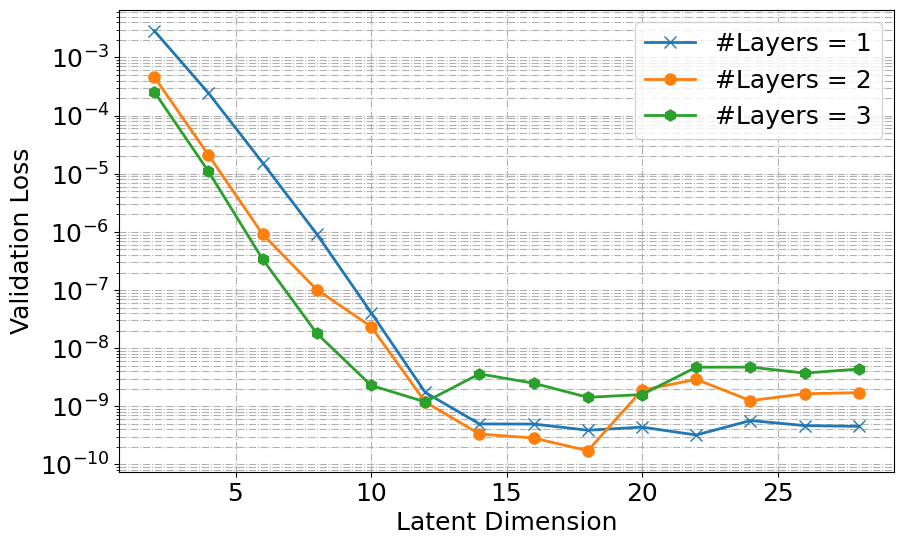

In [33]:
t1 = df_ls[(df_ls.n_layers == 1) ].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t2 = df_ls[(df_ls.n_layers == 2) ].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t3 = df_ls[(df_ls.n_layers == 3) ].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="#Layers = 1", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="#Layers = 2", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='h', label="#Layers = 3", linewidth=2, markersize=8)

ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")

plt.savefig("AE_GF_loss_of_latentDim.pdf")

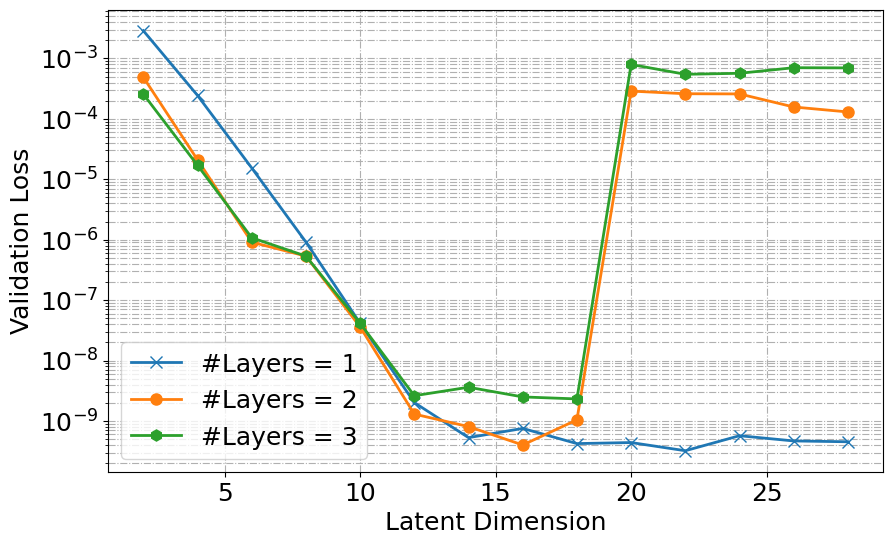

In [34]:
bs = 256
t1 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t2 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t3 = df_ls[(df_ls.n_layers == 3) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="#Layers = 1", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="#Layers = 2", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='h', label="#Layers = 3", linewidth=2, markersize=8)

ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")

plt.savefig("AE_GF_loss_of_latentDim2.pdf")

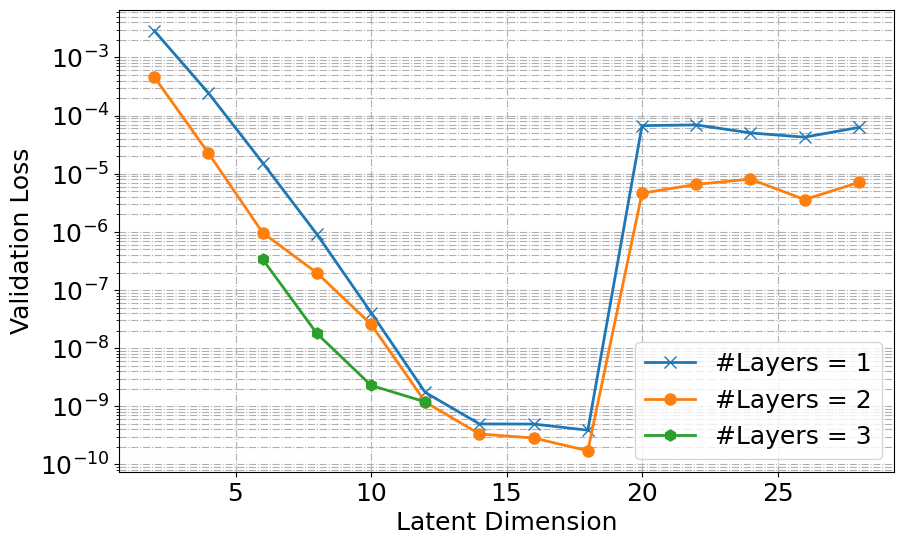

In [35]:
bs = 64
t1 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t2 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t3 = df_ls[(df_ls.n_layers == 3) & (df_ls.batch_size == bs)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="#Layers = 1", linewidth=2, markersize=8)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="#Layers = 2", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='h', label="#Layers = 3", linewidth=2, markersize=8)

ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")

plt.savefig("AE_GF_loss_of_latentDim2.pdf")

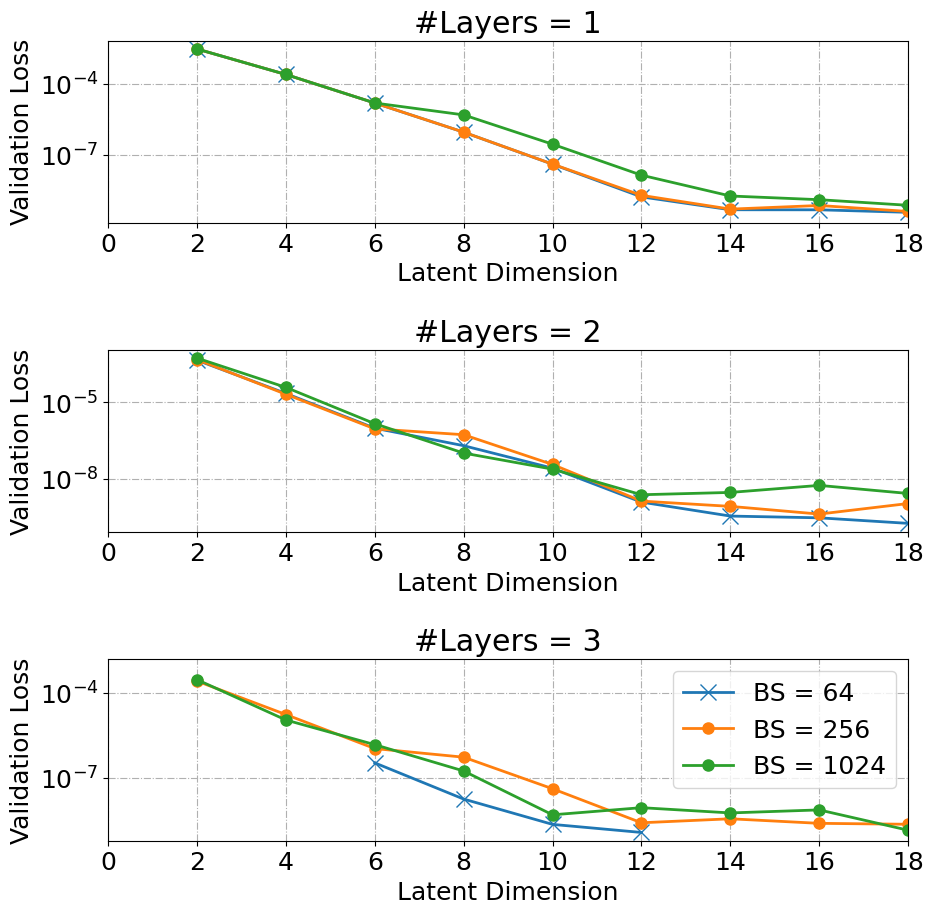

In [36]:
t1 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == 64)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t2 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == 256)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t3 = df_ls[(df_ls.n_layers == 1) & (df_ls.batch_size == 1024)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)

ax = fig.add_subplot(311)
ax.set_title("#Layers = 1")
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="BS = 64", linewidth=2, markersize=12)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="BS = 256", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='o', label="BS = 1024", linewidth=2, markersize=8)
ax.set_yscale('log')
ax.set_xlim((0,18))
ax.grid(axis="both", which="both", linestyle="-.")
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")


t1 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == 64)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t2 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == 256)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t3 = df_ls[(df_ls.n_layers == 2) & (df_ls.batch_size == 1024)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')

ax = fig.add_subplot(312)
ax.set_title("#Layers = 2")
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="BS = 64", linewidth=2, markersize=12)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="BS = 256", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='o', label="BS = 1024", linewidth=2, markersize=8)
ax.set_xlim((0,18))
ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")

ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")


t1 = df_ls[(df_ls.n_layers == 3) & (df_ls.batch_size == 64)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t2 = df_ls[(df_ls.n_layers == 3) & (df_ls.batch_size == 256)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
t3 = df_ls[(df_ls.n_layers == 3) & (df_ls.batch_size == 1024)].sort_values(by=['latent_dim', 'val_loss']).drop_duplicates(subset=['latent_dim'], keep='first')
ax = fig.add_subplot(313)
ax.set_title("#Layers = 3")
ax.plot(t1.latent_dim, t1.val_loss, marker='x', label="BS = 64", linewidth=2, markersize=12)
ax.plot(t2.latent_dim, t2.val_loss, marker='o', label="BS = 256", linewidth=2, markersize=8)
ax.plot(t3.latent_dim, t3.val_loss, marker='o', label="BS = 1024", linewidth=2, markersize=8)
ax.set_yscale('log')
ax.set_xlim((0,18))
ax.grid(axis="both", which="both", linestyle="-.")

ax.legend()
ax.set_xlabel("Latent Dimension")
ax.set_ylabel("Validation Loss")

plt.savefig("AE_GF_loss_of_latentDim_batchSize.pdf")

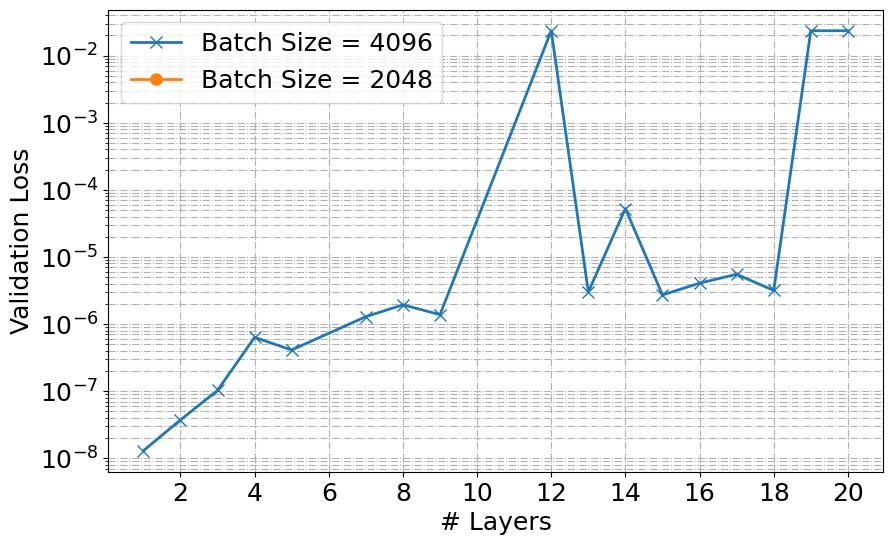

In [37]:
t1 = df_layerS[df_layerS.batch_size == 4096].sort_values(by=['n_layers'])
t2 = df_layerS[df_layerS.batch_size == 2048].sort_values(by=['n_layers'])

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)
ax.plot(t1.n_layers, t1.val_loss, marker='x', label="Batch Size = 4096", linewidth=2, markersize=8)
ax.plot(t2.n_layers, t2.val_loss, marker='o', label="Batch Size = 2048", linewidth=2, markersize=8)

ax.set_yscale('log')
ax.grid(axis="both", which="both", linestyle="-.")
ax.legend()
ax.set_xlabel("# Layers")
ax.set_ylabel("Validation Loss")
ax.set_xticks(ticks=[2,4,6,8,10,12,14,16,18,20])

plt.savefig("AE_GF_loss_of_n_layers.pdf")

In [38]:
df_layerS[df_ls.batch_size == 4096].sort_values(by=['n_layers'])

C:\Users\Atomt\AppData\Local\Temp\ipykernel_18880\4240529726.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_layerS[df_ls.batch_size == 4096].sort_values(by=['n_layers'])


Empty DataFrame
Columns: [VersionID, best_epoch, val_loss, batch_size, n_layers]
Index: []

In [39]:
pl_i = 19
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
device = "cpu"
model.setup()
model.to(device)
model.eval()

c:\Users\Atomt\anaconda3\envs\MLTut\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.3, which is newer than your current Lightning version: v2.0.9.post0
  rank_zero_warn(


AutoEncoder_01(
  (dropout_in): Identity()
  (dropout): Identity()
  (loss): MSELoss()
  (activation): ReLU()
  (encoder): Sequential(
    (0): Identity()
    (1): Linear(in_features=200, out_features=106, bias=True)
    (2): Identity()
    (3): ReLU()
    (4): Identity()
    (5): Linear(in_features=106, out_features=12, bias=True)
    (6): Identity()
    (7): Identity()
  )
  (decoder): Sequential(
    (0): Identity()
    (1): Linear(in_features=12, out_features=106, bias=True)
    (2): Identity()
    (3): ReLU()
    (4): Identity()
    (5): Linear(in_features=106, out_features=200, bias=True)
    (6): Identity()
    (7): Identity()
  )
)

In [40]:
ind = 1234
x_test, y_test = model.val_dataset[ind]
x_test = x_test.to(device).reshape(1,-1)

In [41]:
model.state_dict();

In [42]:
encder_weights_1 = model.state_dict()['encoder.1.weight'].detach().numpy()
encder_bias_1    = model.state_dict()['encoder.1.bias'].detach().numpy()

In [43]:
encder_weights_2 = model.state_dict()['encoder.5.weight'].detach().numpy()
encder_bias_2    = model.state_dict()['encoder.5.bias'].detach().numpy()

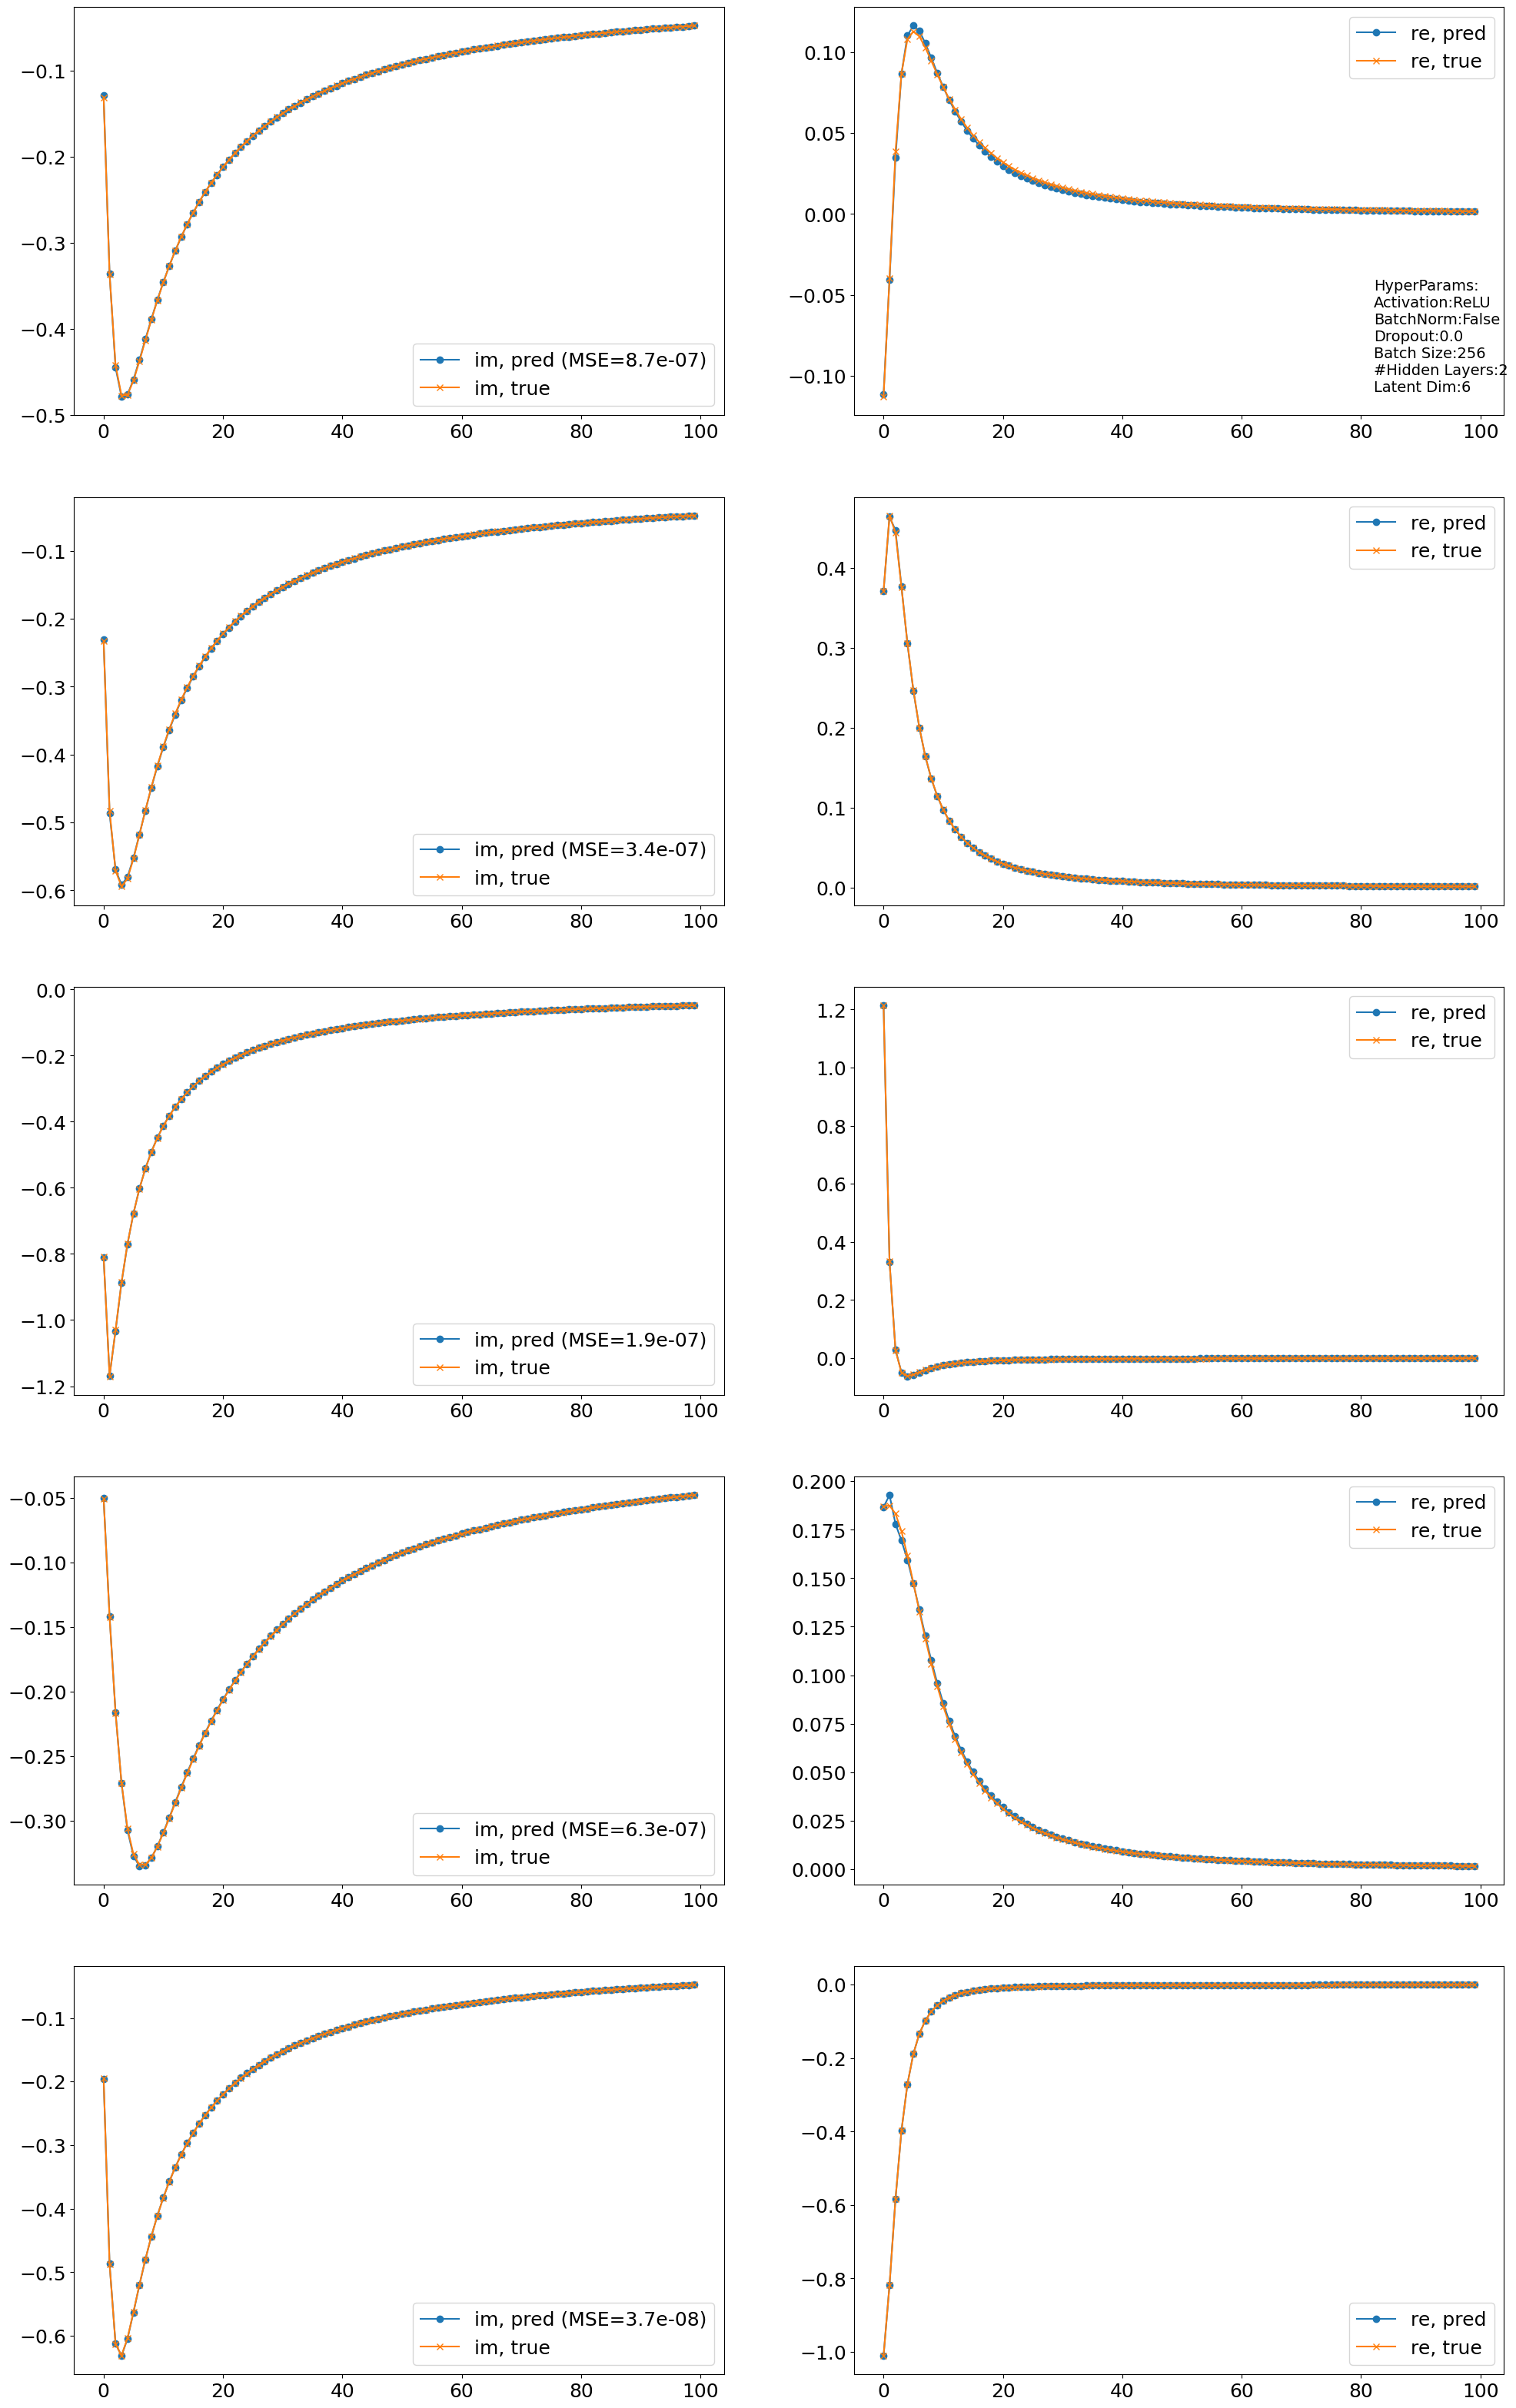

In [44]:
pl_i = 58
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
model.setup()
device = "cpu"
model.to(device)
model.eval()
ind_list = [-1, -2, -3, -1510,-1511]

fig,ax = plt.subplots(len(ind_list),2, figsize=(24,8*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_test = model.val_dataset[ind]
    x_test = x_test.to(device).reshape(1,-1)
    y_pred = model(x_test)
    loss = model.loss(y_pred, x_test)
    y_pred = y_pred.detach().numpy()
    #
    if i == 0:
        text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
        ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
        verticalalignment='bottom')
    ax[i,0].plot(y_pred[0,100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
    ax[i,0].plot(y_test[100:], marker="x", label=f"im, true")
    ax[i,0].legend()

    ax[i,1].plot(y_pred[0,0:100], marker="o", markersize=6, label="re, pred")
    ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
    ax[i,1].legend()
    
#fig.suptitle('No Dropout, Weighted, Medium Model Size, Medium Training Size ', fontsize=20)
plt.savefig("demo_AE_{}.pdf".format(pl_i))
#plt.show()

c:\Users\Atomt\anaconda3\envs\MLTut\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.3, which is newer than your current Lightning version: v2.0.9.post0
  rank_zero_warn(


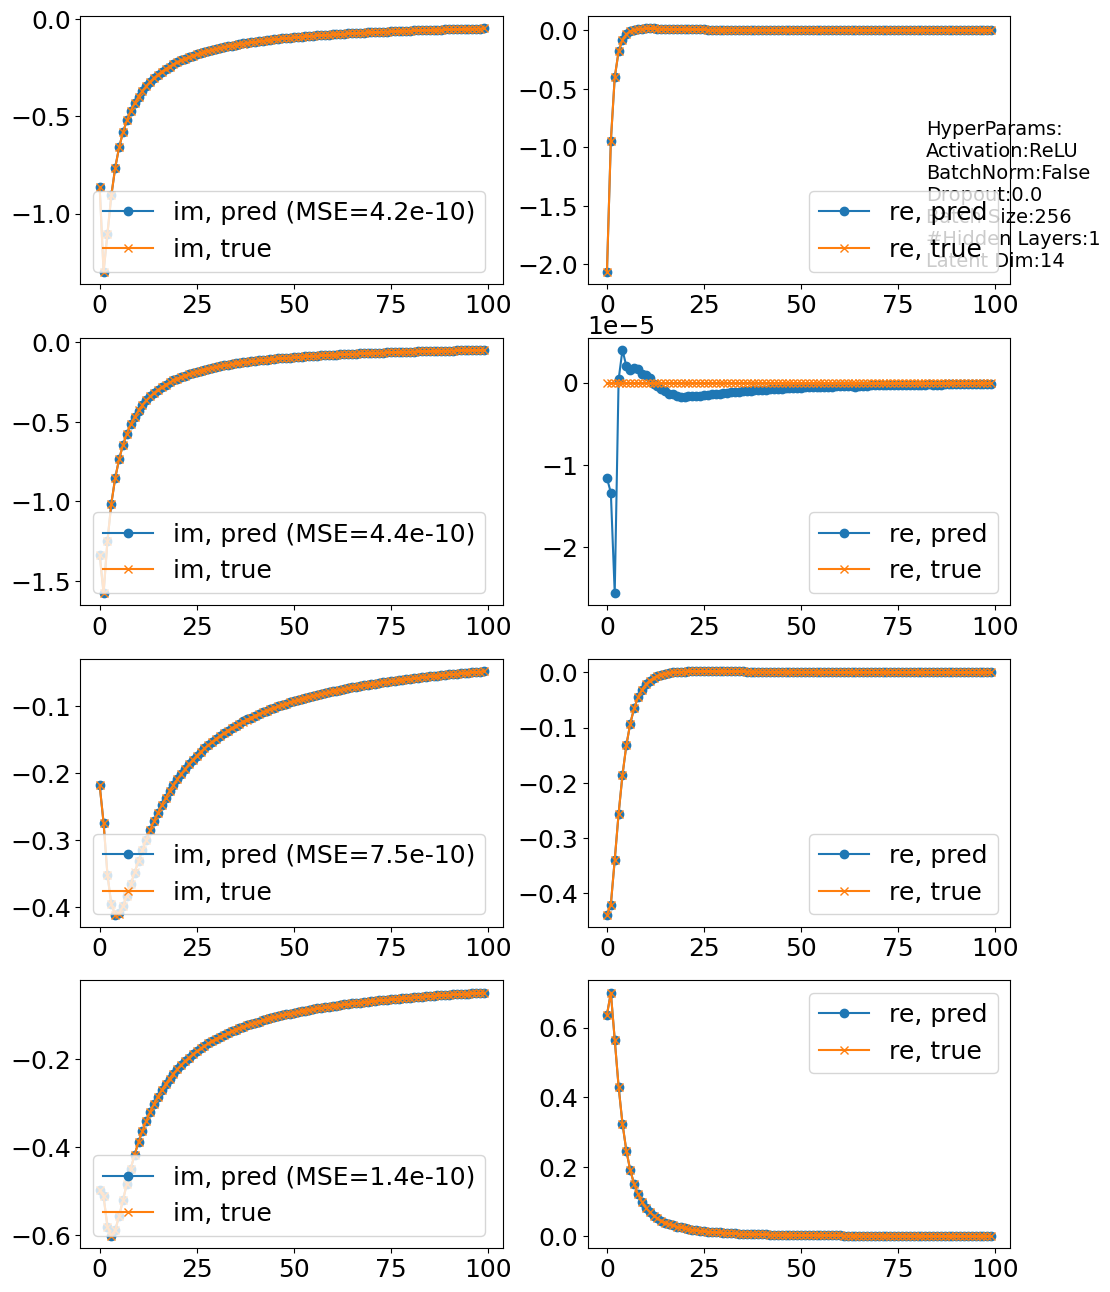

In [45]:
pl_i = 48
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
model.hparams["train_path"] = "G:\\Codes\\jED.jl\\data_batch1_NB3_nPrune.hdf5"
model.setup()
device = "cpu"
model.to(device)
model.eval()
ind_list = [-1, -2, -3, -1511]

fig,ax = plt.subplots(len(ind_list),2, figsize=(12,4*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_test = model.val_dataset[ind]
    x_test = x_test.to(device).reshape(1,-1)
    y_pred = model(x_test)
    loss = model.loss(y_pred, x_test)
    y_pred = y_pred.detach().numpy()
    #
    if i == 0:
        text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
        ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
        verticalalignment='bottom')
    ax[i,0].plot(y_pred[0,100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
    ax[i,0].plot(x_test[0,100:], marker="x", label=f"im, true")
    ax[i,0].legend()

    ax[i,1].plot(y_pred[0,0:100], marker="o", markersize=6, label="re, pred")
    ax[i,1].plot(x_test[0,0:100], marker="x", label="re, true")
    ax[i,1].legend()
    
#fig.suptitle('No Dropout, Weighted, Medium Model Size, Medium Training Size ', fontsize=20)
plt.savefig("demo_AE_{}_NB3_gen.pdf".format(pl_i))
#plt.show()

In [46]:
x_test, y_test = model.val_dataset[ind]

In [47]:
y_test - x_test

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

c:\Users\Atomt\anaconda3\envs\MLTut\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.3, which is newer than your current Lightning version: v2.0.9.post0
  rank_zero_warn(
c:\Users\Atomt\anaconda3\envs\MLTut\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.3, which is newer than your current Lightning version: v2.0.9.post0
  rank_zero_warn(
c:\Users\Atomt\anaconda3\envs\MLTut\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.3, which is newer than your current Lightning version: v2.0.9.post0
  rank_zero_warn(
c:\Users\Atomt\anaconda3\envs\MLTut\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.3, which is newer 

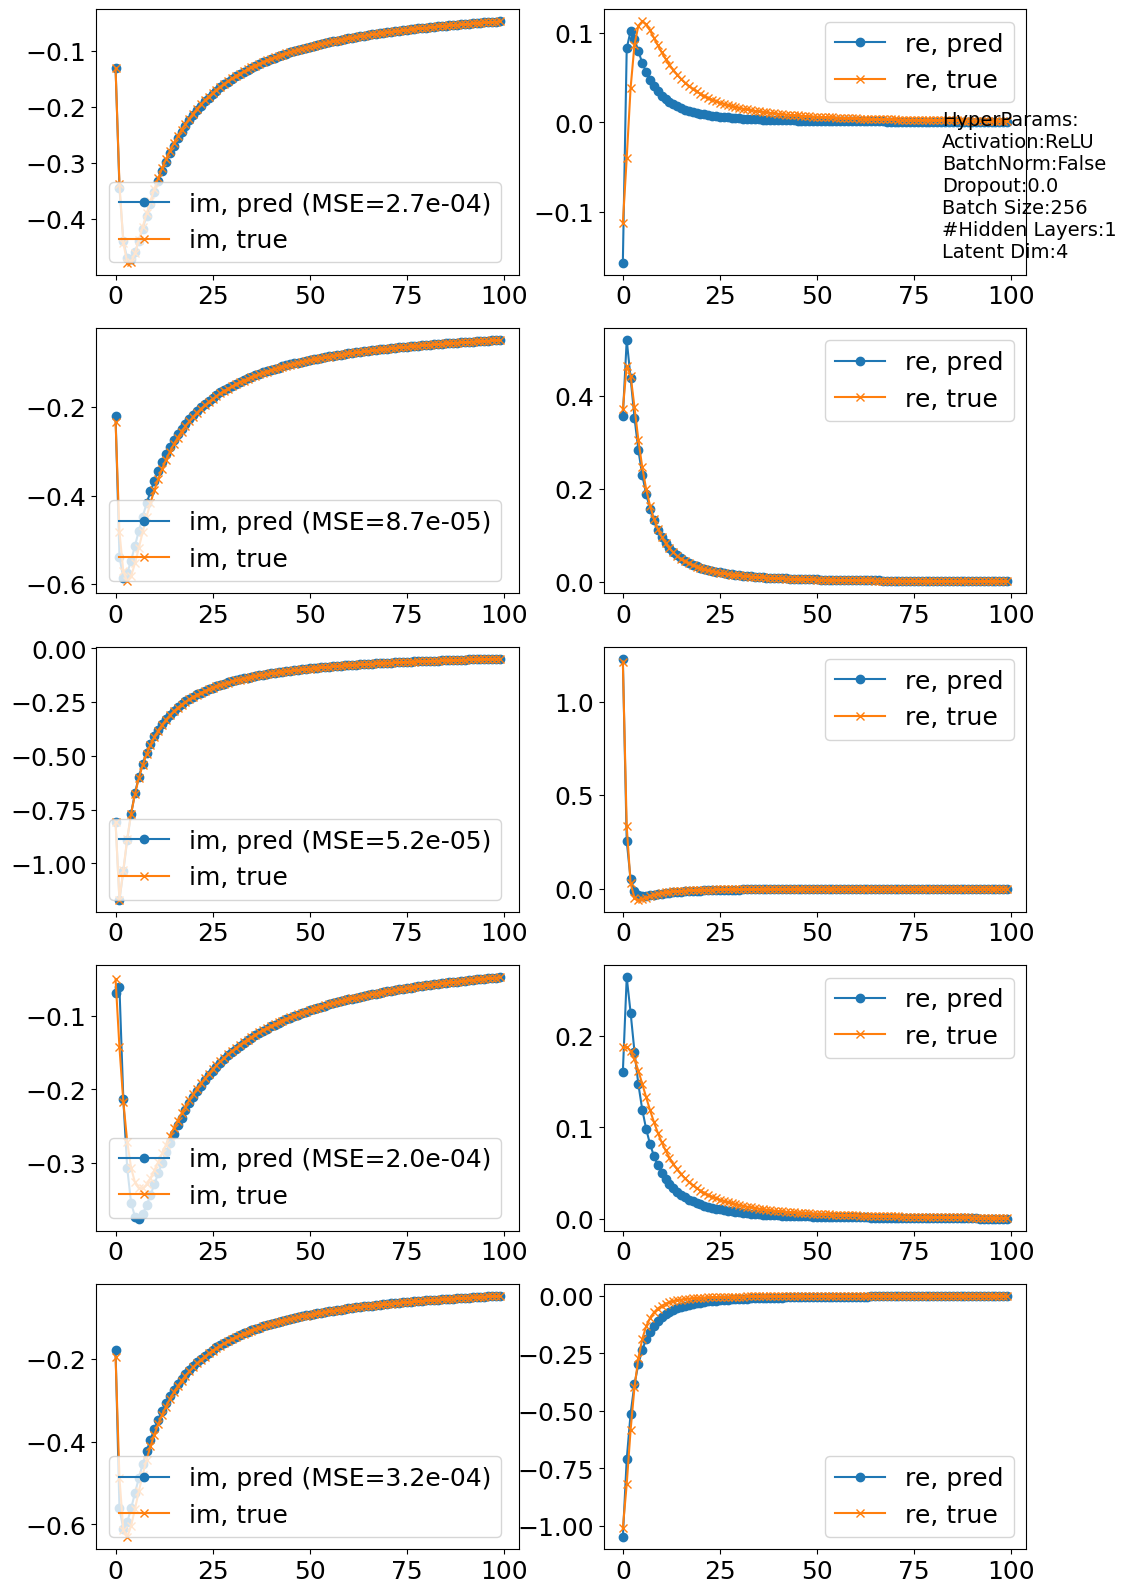

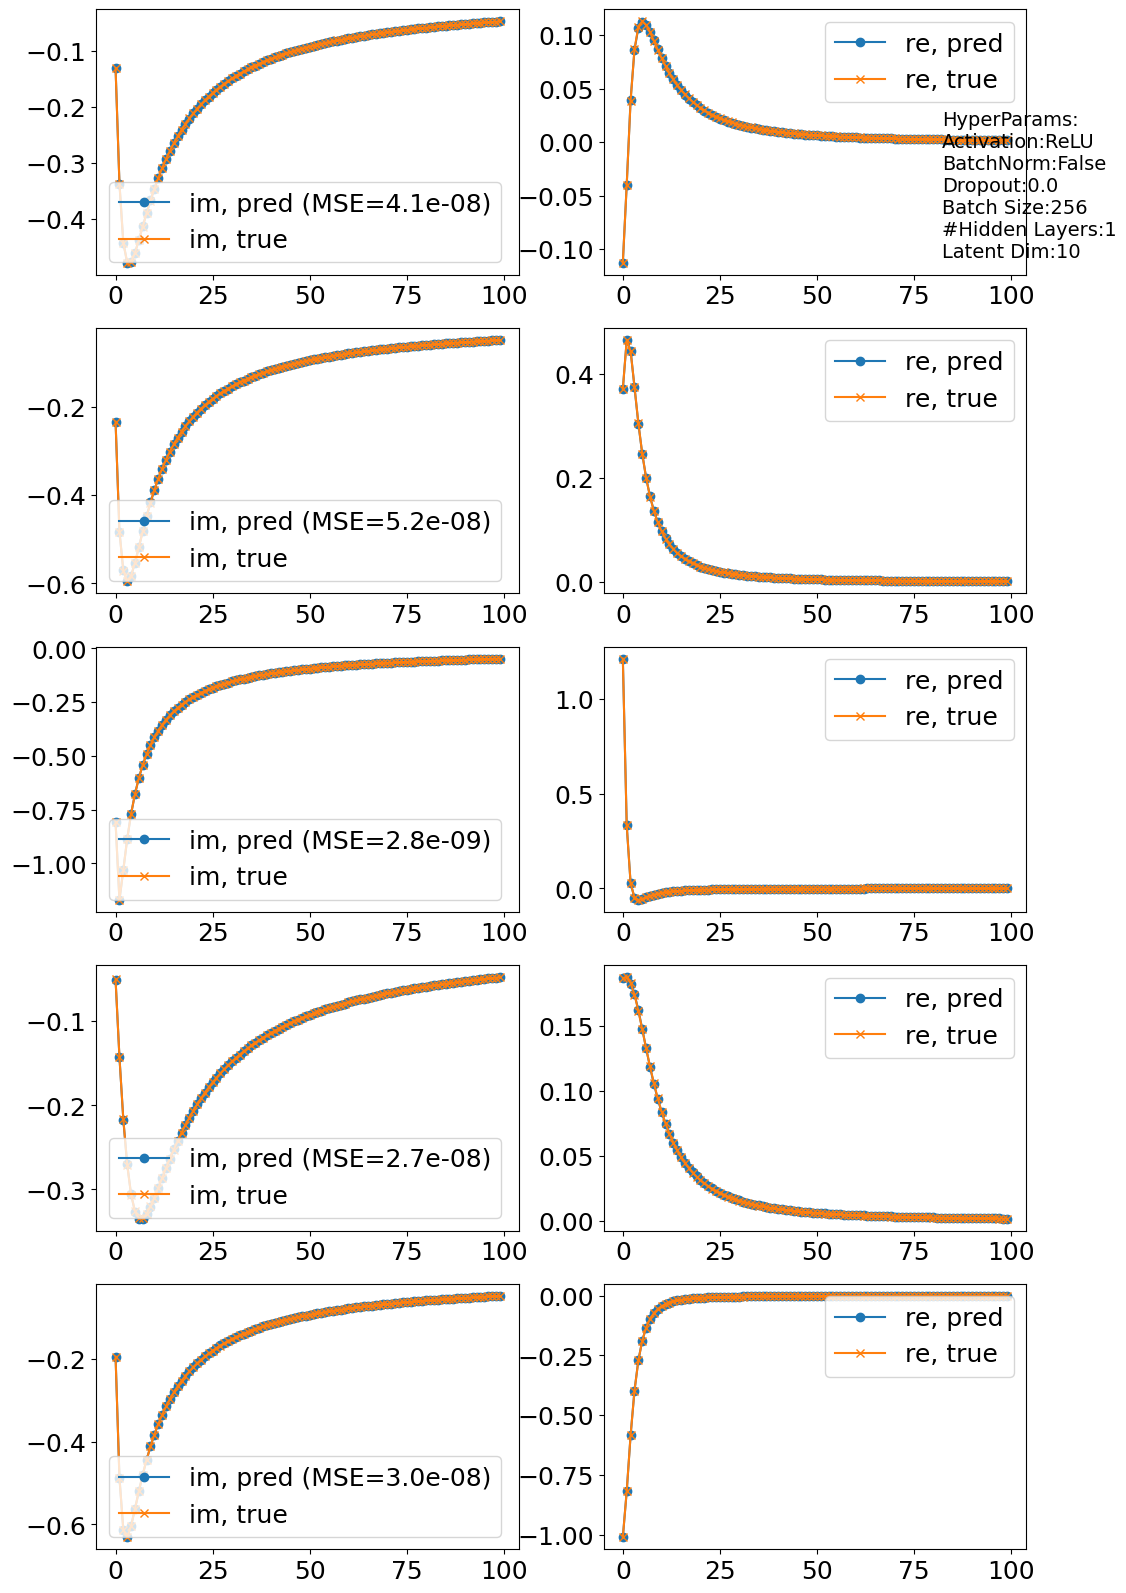

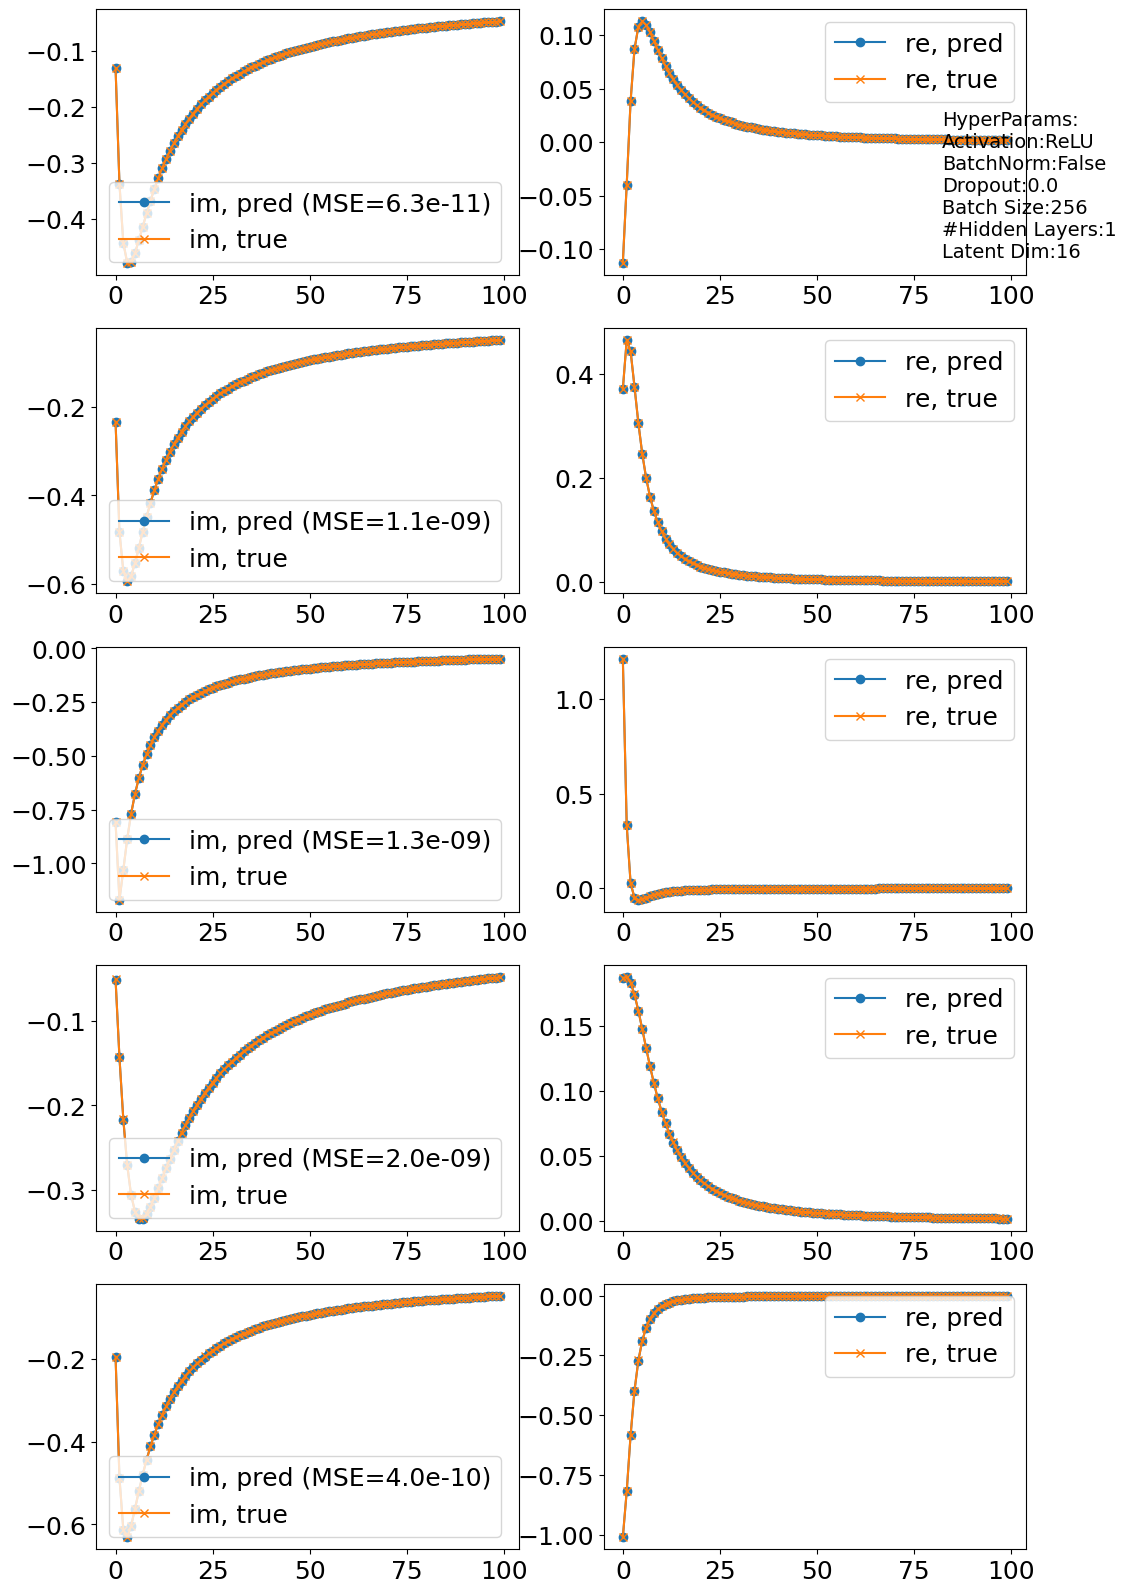

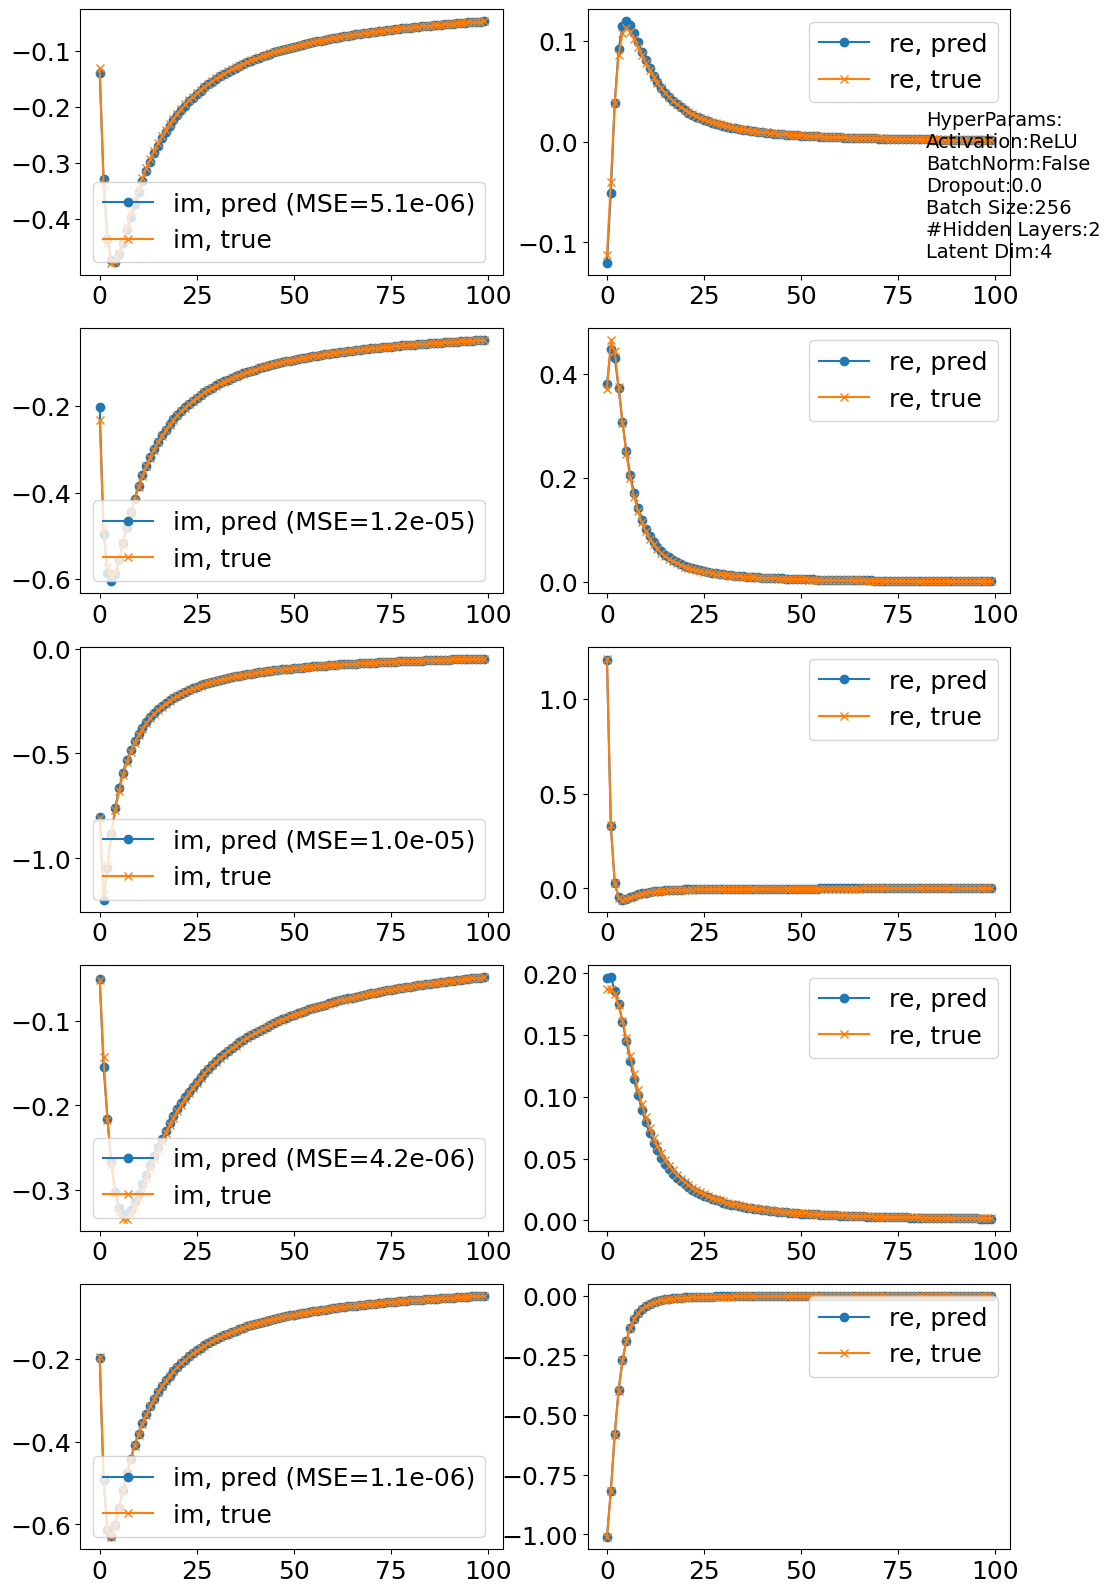

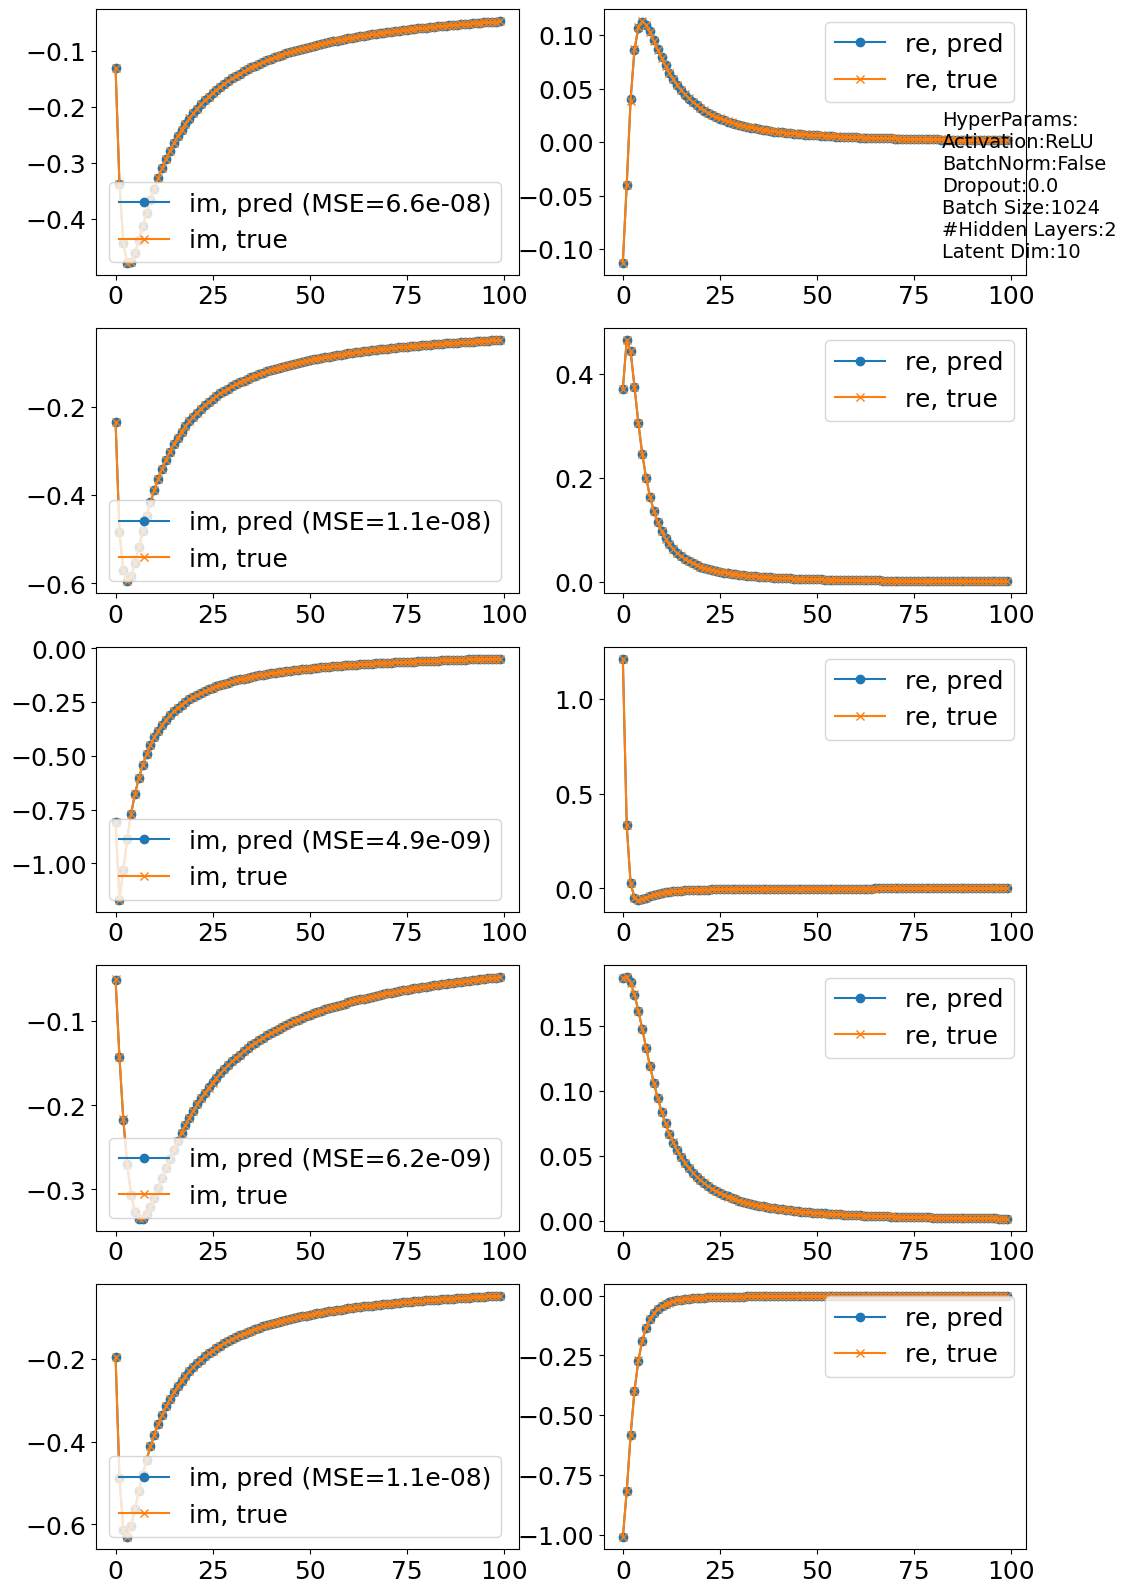

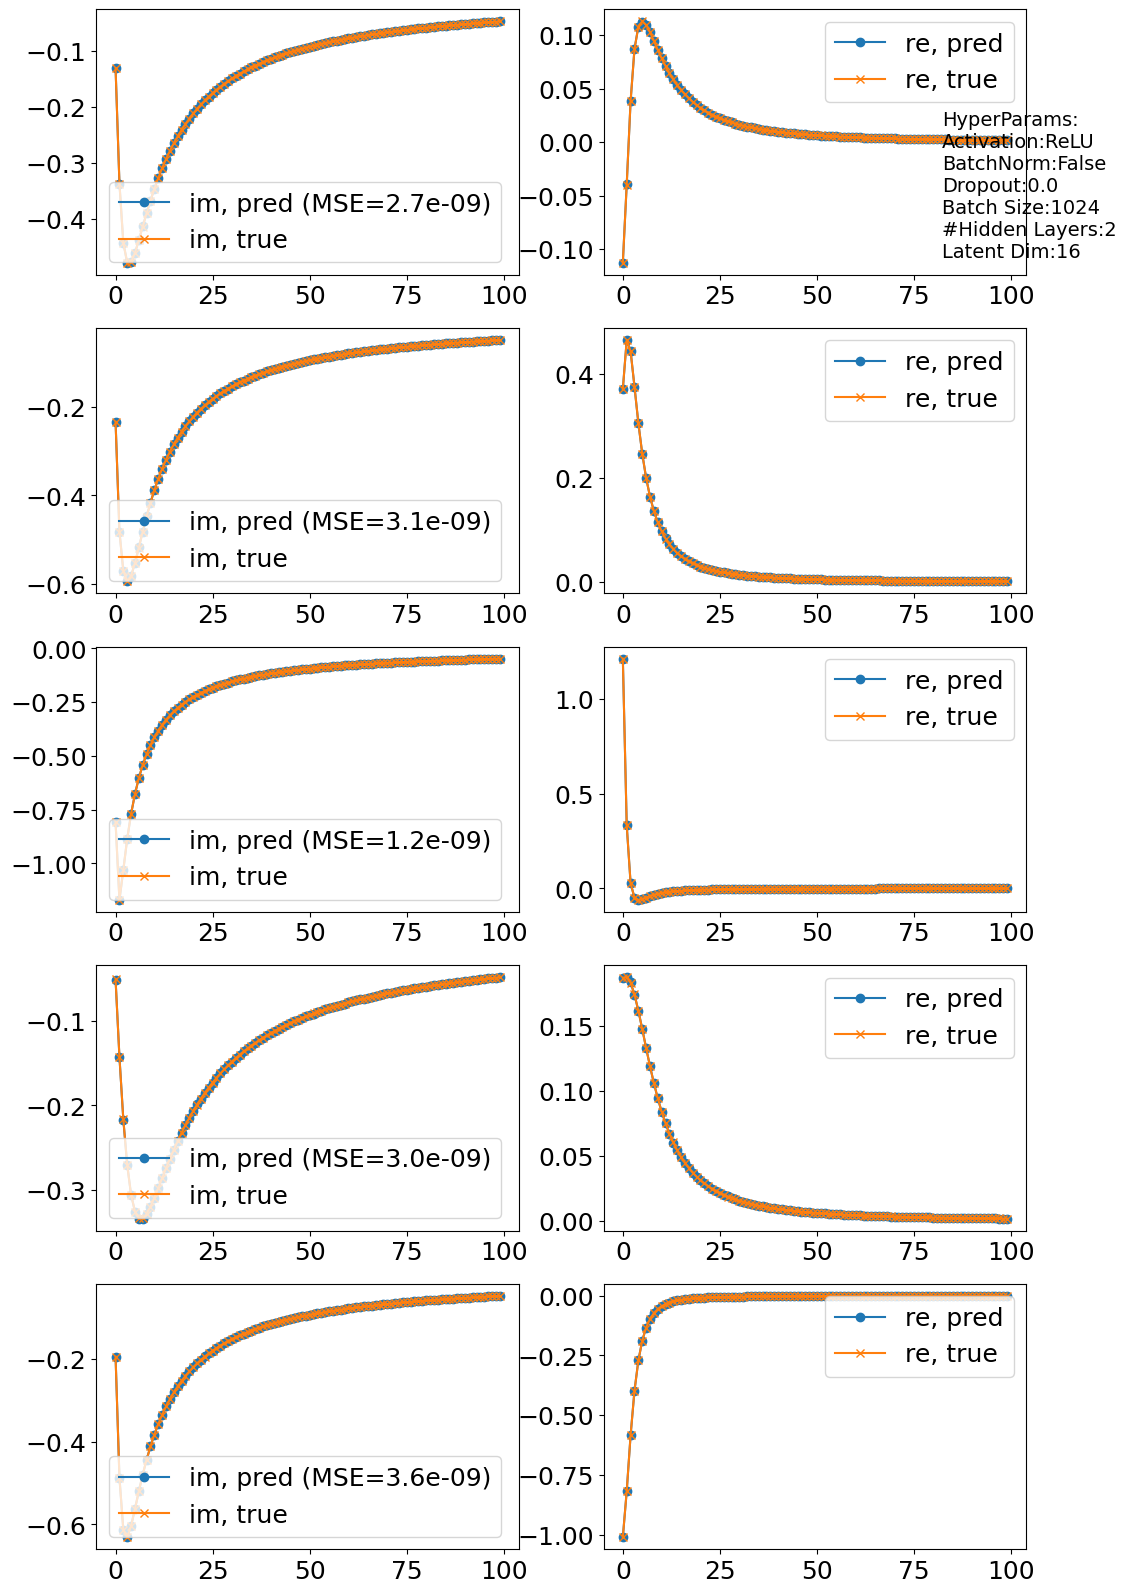

In [48]:
for pl_i in [1 + 42,4 + 42,7 + 42,15 + 42,18,21]:
    model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
    model.setup()
    device = "cpu"
    model.to(device)
    model.eval()
    ind_list = [-1, -2, -3, -1510,-1511]

    fig,ax = plt.subplots(len(ind_list),2, figsize=(12,4*len(ind_list)))
    for i,ind in enumerate(ind_list):
        x_test, y_test = model.val_dataset[ind]
        x_test = x_test.to(device).reshape(1,-1)
        y_pred = model(x_test)
        loss = model.loss(y_pred, x_test)
        y_pred = y_pred.detach().numpy()
        #
        if i == 0:
            text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
            ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
            verticalalignment='bottom')
        ax[i,0].plot(y_pred[0,100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
        ax[i,0].plot(y_test[100:], marker="x", label=f"im, true")
        ax[i,0].legend()

        ax[i,1].plot(y_pred[0,0:100], marker="o", markersize=6, label="re, pred")
        ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
        ax[i,1].legend()
        
    #fig.suptitle('No Dropout, Weighted, Medium Model Size, Medium Training Size ', fontsize=20)
    plt.savefig("demo_AE_{}.pdf".format(pl_i))
    #plt.show()

c:\Users\Atomt\anaconda3\envs\MLTut\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:55: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.1.3, which is newer than your current Lightning version: v2.0.9.post0
  rank_zero_warn(


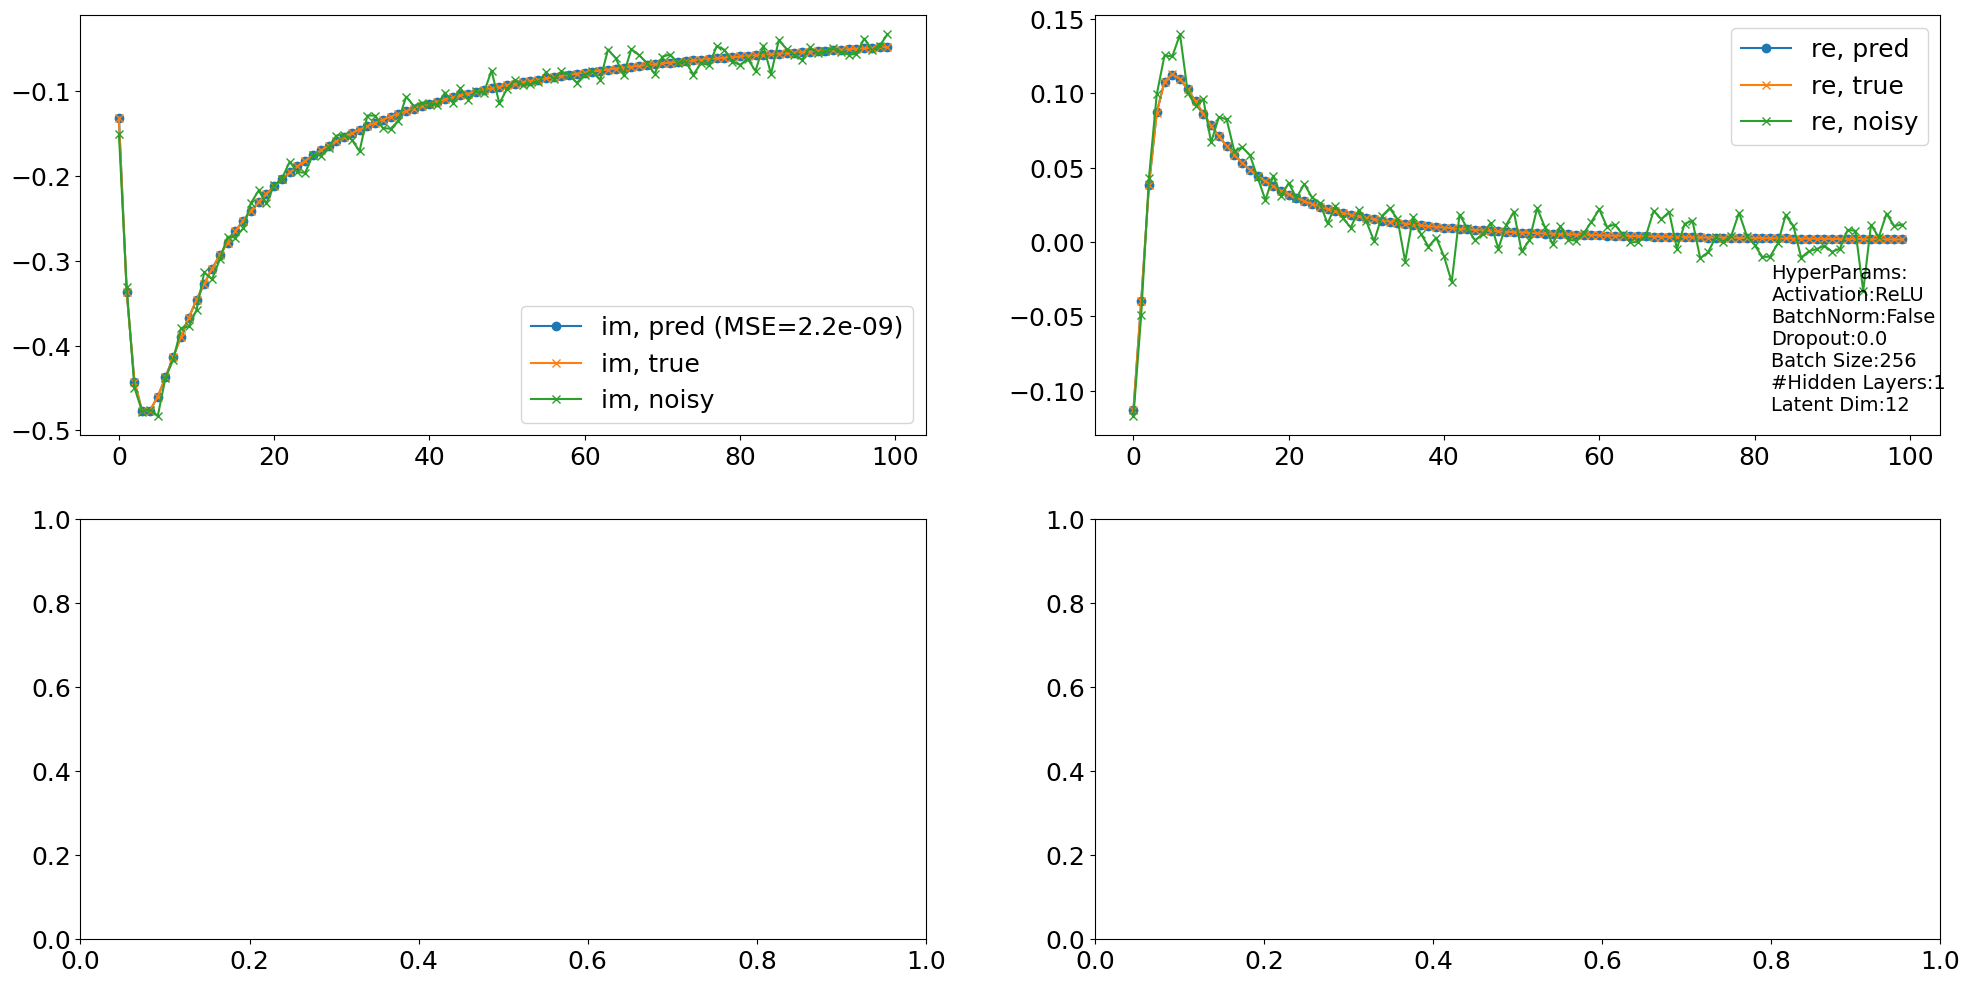

In [49]:
pl_i = 47
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
model.setup()
device = "cpu"
model.to(device)
model.eval()
ind_list = [-1, -2, -3, -1510,-1511]

fig,ax = plt.subplots(2,2, figsize=(24,12))
i = 0
ind = -1
x_test, y_test = model.val_dataset[ind]

x_test = x_test.to(device).reshape(1,-1)[0]
noise = np.random.normal(0.0, 0.01, size=x_test.shape)
x_test_noisy = x_test + noise
y_pred_noisy = model(x_test_noisy)
y_pred = model(x_test)
loss_noisy = model.loss(y_pred_noisy, x_test)
loss = model.loss(y_pred, x_test)
y_pred = y_pred.detach().numpy()
y_pred_noisy = y_pred_noisy.detach().numpy()
#
if i == 0:
    text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
    ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
    verticalalignment='bottom')
ax[i,0].plot(y_pred[100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
ax[i,0].plot(y_test[100:], marker="x", label=f"im, true")
ax[i,0].plot(x_test_noisy[100:], marker="x", label=f"im, noisy")
ax[i,0].legend()

ax[i,1].plot(y_pred[0:100], marker="o", markersize=6, label="re, pred")
ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
ax[i,1].plot(x_test_noisy[0:100], marker="x", label=f"re, noisy")
ax[i,1].legend()


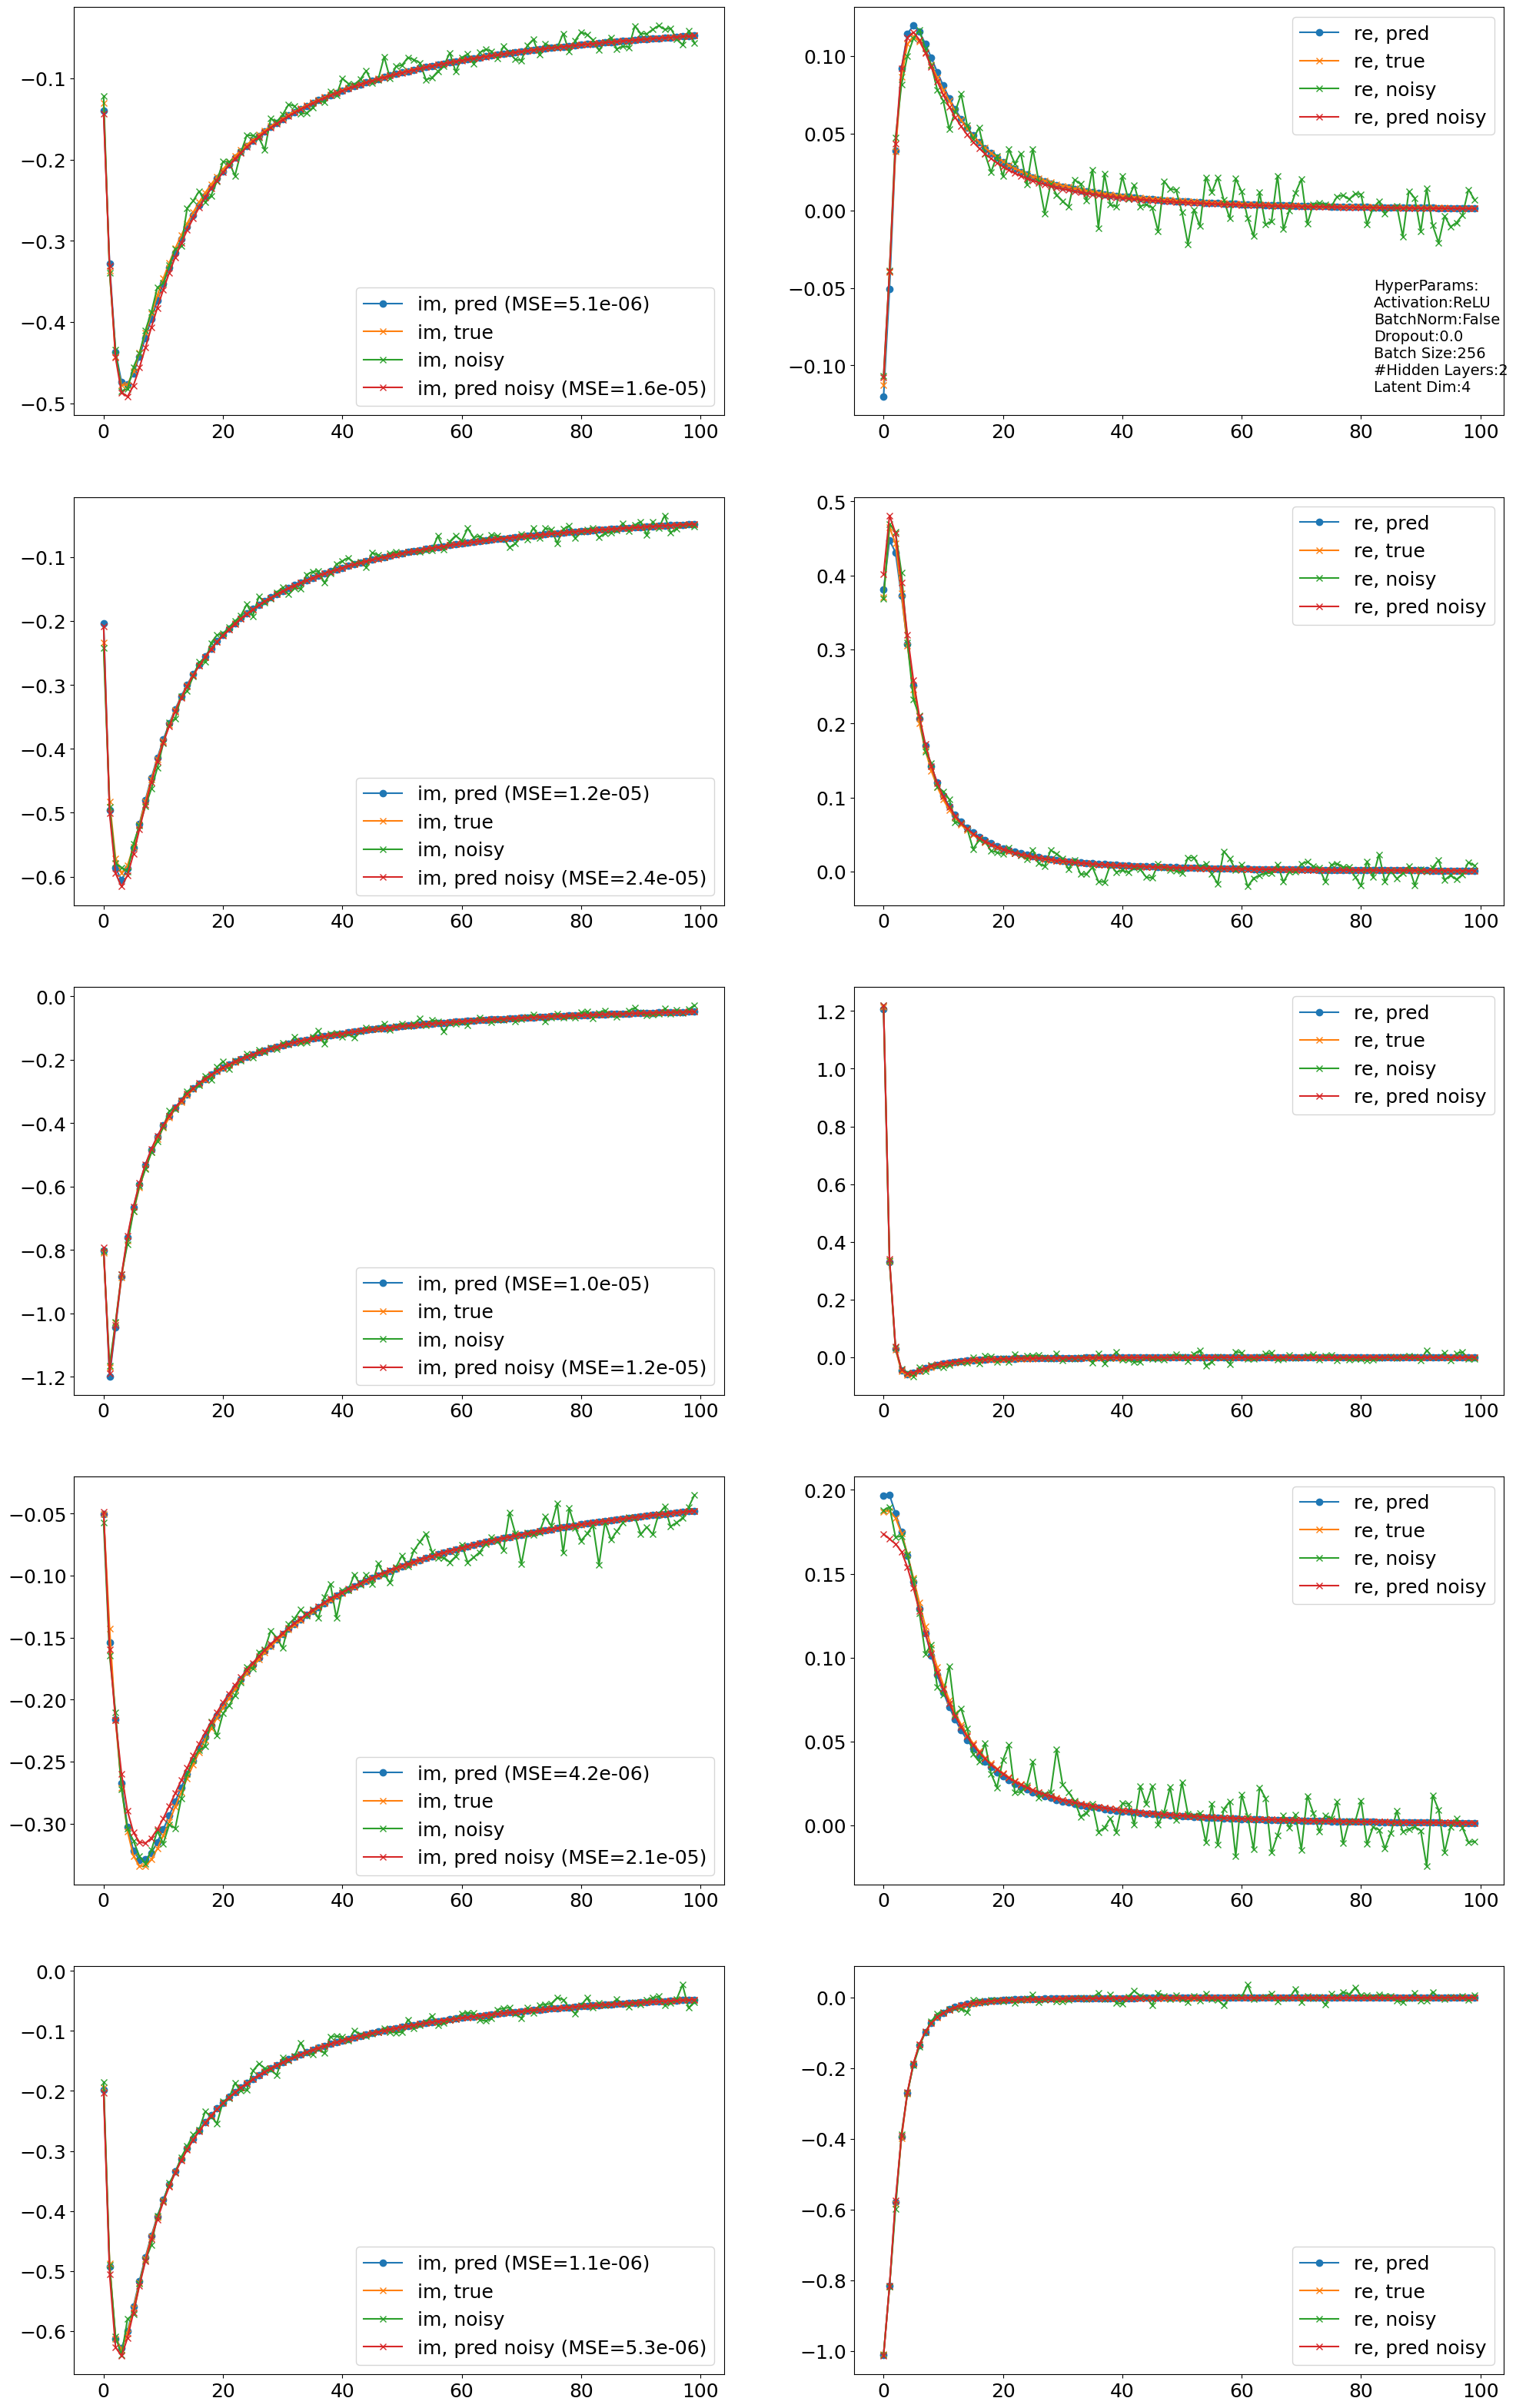

In [50]:
pl_i = 57
model = AutoEncoder_01.load_from_checkpoint("lightning_logs/AE_nPrune_02_nLayers_LatentScaling/version_{}/checkpoints/last.ckpt".format(pl_i))
model.setup()
device = "cpu"
model.to(device)
model.eval()
ind_list = [-1, -2, -3, -1510,-1511]

fig,ax = plt.subplots(len(ind_list),2, figsize=(24,8*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_test = model.val_dataset[ind]
    
    x_test = x_test.to(device).reshape(1,-1)[0]
    noise = np.random.normal(0.0, 0.01, size=x_test.shape)
    x_test_noisy = x_test + noise
    y_pred_noisy = model(x_test_noisy)
    y_pred = model(x_test)
    loss_noisy = model.loss(y_pred_noisy, x_test)
    loss = model.loss(y_pred, x_test)
    y_pred = y_pred.detach().numpy()
    y_pred_noisy = y_pred_noisy.detach().numpy()
    #
    if i == 0:
        text = "HyperParams:\nActivation:{}\nBatchNorm:{}\nDropout:{}\nBatch Size:{}\n#Hidden Layers:{}\nLatent Dim:{}".format(model.hparams["activation"],model.hparams["with_batchnorm"],model.hparams["dropout"], model.hparams["batch_size"], model.hparams["n_layers"], model.hparams["latent_dim"])
        ax[i,1].text(0.80, 0.05, text, transform=ax[i,1].transAxes, fontsize=14,
        verticalalignment='bottom')
    ax[i,0].plot(y_pred[100:], marker="o", markersize=6, label=f"im, pred (MSE={loss:.1e})")
    ax[i,0].plot(y_test[100:], marker="x", label=f"im, true")
    ax[i,0].plot(x_test_noisy[100:], marker="x", label=f"im, noisy")
    ax[i,0].plot(y_pred_noisy[100:], marker="x", label=f"im, pred noisy (MSE={loss_noisy:.1e})")
    ax[i,0].legend()

    ax[i,1].plot(y_pred[0:100], marker="o", markersize=6, label="re, pred")
    ax[i,1].plot(y_test[0:100], marker="x", label="re, true")
    ax[i,1].plot(x_test_noisy[0:100], marker="x", label=f"re, noisy")
    ax[i,1].plot(y_pred_noisy[0:100], marker="x", label=f"re, pred noisy")
    ax[i,1].legend()

plt.savefig("denoise_demo.pdf")